# Task 1- Vector fields, orbits, and visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from helpers.math import get_diagonalizable_square_matrix_from_eigen, calc_flows
from helpers.plots import plot_eigenvalues, plot_phase_portrait

from collections import namedtuple


In [2]:
Eigen = namedtuple("Eigen", "eigenvalues eigenvectors")

# NOTE Eigenvectors are rows
eigen_dict = {
    "stable_node": Eigen([-1, -2], [[1, 0], [0, 1]]),
    "stable_focus": Eigen([-0.2 + 1j, -0.2 - 1j], [[1, 1j], [1, -1j]]),
    "unstable_saddle": Eigen([-1, +1], [[0, 1], [1, 0]]),
    "unstable_node": Eigen([1, 2], [[1, 0], [0, 1]]),
    "unstable_focus": Eigen([0.2 + 1j, 0.2 - 1j], [[1, 1j], [1, -1j]]),
}


Type: unstable node
Eigenvalues: [1. 2.]
Eigenvectors: [1. 0.]; [0. 1.]
Resulting matrix A:
[[1. 0.]
 [0. 2.]]


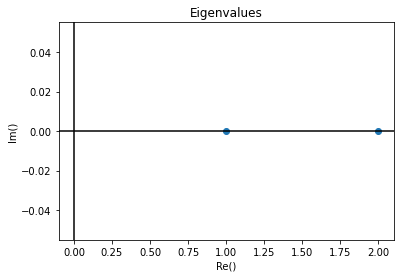

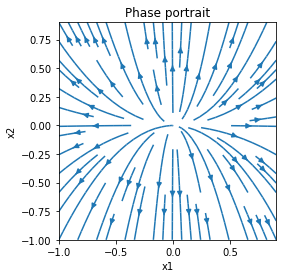

In [3]:
key = "unstable_node"

eigenvalues, eigenvectors = eigen_dict[key]
A = get_diagonalizable_square_matrix_from_eigen(eigenvalues, eigenvectors)

print(f"Type: {key.replace('_', ' ')}")
print(f"Eigenvalues: {np.linalg.eig(A)[0]}")
print(f"Eigenvectors: {'; '.join(str(eigenvector) for eigenvector in np.linalg.eig(A)[1].T)}")
print(f"Resulting matrix A:\n{A}")

fig, ax = plt.subplots(1, 1)
ax = plot_eigenvalues(np.array(eigenvalues), ax=ax)
ax.set_title("Eigenvalues")
plt.show()

mesh_tuple, flow_tuple = calc_flows(A.real)
fig, ax = plt.subplots(1, 1)
ax = plot_phase_portrait(mesh_tuple, flow_tuple, ax=ax)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Phase portrait")
plt.show()
